<a href="https://colab.research.google.com/github/hardinet/Projet1/blob/main/Visualition%20des%20donn%C3%A9es%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Chargement des données

In [ ]:
#1.1. Importer les bibliothèques nécessaires

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1.2. Charger les données du fichier CSV

In [ ]:
# Charger les données depuis le fichier CSV
df = pd.read_csv("sales_data.csv")

# Afficher les 5 premières lignes
(df.head())

,TransactionID,Date,Product,Category,Sales,Quantity,Region
0,1,2023-05-09,Jeans,Clothing,127.33,8,Asia
1,2,2023-11-03,Phone,Electronics,304.41,9,America
2,3,2023-06-28,T-shirt,Clothing,341.79,4,Asia
3,4,2023-06-05,Headphones,Electronics,145.75,1,Europe
4,5,2023-07-09,T-shirt,Furniture,290.64,9,Europe


2. Exploration des données

2.1. Combien de transaction


In [ ]:
print(f"Le DataFrame contient {df.shape[0]} transactions et {df.shape[1]} colonnes.")

Le DataFrame contient 100 transactions et 7 colonnes.


methode 2

In [ ]:
df.shape

(100, 7)

2.2. Listez les catégories de produits disponibles et leur nombre

In [ ]:
df["Category"].value_counts()

,count
Category,
Electronics,35
Furniture,33
Clothing,32


methode 2

In [ ]:
categories = df['Category'].unique()
print(f"Les catégories disponibles sont : {categories}")
print(f"Nombre de catégories de produits : {len(categories)}")

Les catégories disponibles sont : ['Clothing' 'Electronics' 'Furniture']
Nombre de catégories de produits : 3


2.3. Afficher un résumé statistique des colonnes numériques

In [ ]:
# Résumé statistique des colonnes numériques
df.describe()

,TransactionID,Sales,Quantity
count,100.000000,100.000000,100.000000
mean,50.500000,511.901200,5.180000
std,29.011492,284.378869,2.552005
min,1.000000,13.510000,1.000000
25%,25.750000,279.042500,3.000000
50%,50.500000,528.170000,5.000000
75%,75.250000,742.697500,7.250000
max,100.000000,995.370000,9.000000


3. Analyse des données

3.1. Calculez les ventes totales pour chaque région

In [ ]:
## Calcul des ventes totales par région
sales_by_region = df.groupby('Region')['Sales'].sum()
(sales_by_region)

,Sales
Region,
America,16423.59
Asia,17035.31
Europe,17731.22


3.2. Quel est le produit le plus vendu en termes de quantité ?

In [ ]:
# Produit le plus vendu en termes de quantité
product_sales = df.groupby('Product')['Quantity'].sum()
top_product = product_sales.idxmax()
print(f"Le produit le plus vendu en termes de quantité est : {top_product}")

Le produit le plus vendu en termes de quantité est : T-shirt


ou

3.3. Quelle catégorie de produits a généré le chiffre d'affaires le plus élevé ?

In [ ]:
# Catégorie avec le chiffre d'affaires le plus élevé
category_sales = df.groupby('Category')['Sales'].sum()
top_category = category_sales.idxmax()
print(f"La catégorie ayant généré le chiffre d'affaires le plus élevé est : {top_category}")

La catégorie ayant généré le chiffre d'affaires le plus élevé est : Furniture


4. Visualisation des données
4.1. Tracez un graphique en barres pour afficher les ventes totales par région

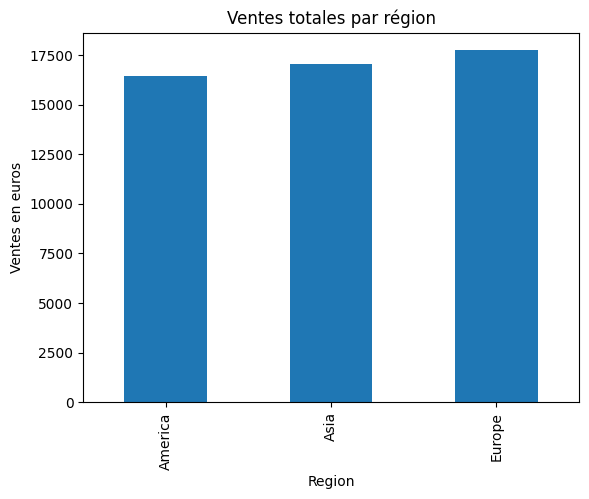

In [ ]:
# Graphique en barres pour les ventes par région
sales_by_region.plot(kind='bar', title="Ventes totales par région")
plt.ylabel('Ventes en euros')
plt.show()

4.2. Tracez un graphique en secteurs (pie chart) pour la répartition des ventes par catégorie

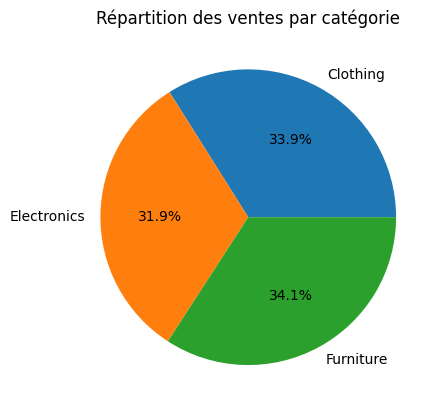

In [ ]:
# Graphique en secteurs pour la répartition des ventes par catégorie
category_sales.plot(kind='pie', title="Répartition des ventes par catégorie", autopct='%1.1f%%')
plt.ylabel('')  # Enlever le label de l'axe y
plt.show()

4.3. Tracez un graphique linéaire montrant l'évolution des ventes dans le temps
Nous allons d'abord convertir la colonne "Date" en datetime, puis regrouper les ventes par date.

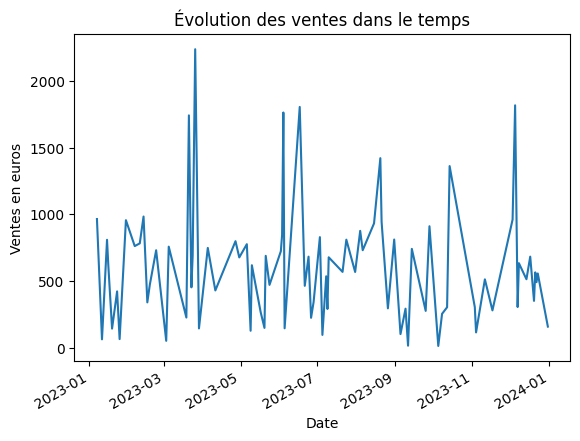

In [ ]:
# Convertir la colonne Date en datetime
df['Date'] = pd.to_datetime(df['Date'])

# Regrouper les ventes par date
sales_over_time = df.groupby('Date')['Sales'].sum()

# Graphique linéaire pour l'évolution des ventes
sales_over_time.plot(kind='line', title="Évolution des ventes dans le temps")
plt.ylabel('Ventes en euros')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

5. Tableaux croisés et tables pivot
Créez une table pivot montrant le total des ventes par Région et par Catégorie

In [ ]:
# Table pivot des ventes par région et catégorie
pivot_sales = df.pivot_table(values='Sales', index='Region', columns='Category', aggfunc='sum')
(pivot_sales)

Category,Clothing,Electronics,Furniture
Region,,,
America,4598.81,4949.91,6874.87
Asia,7282.08,5324.43,4428.80
Europe,5493.47,6062.61,6175.14


5.2. Créez une table pivot montrant la quantité moyenne vendue par produit dans chaque région
python
Copier le code


In [ ]:
# Table pivot des quantités moyennes par produit et région
pivot_quantity = df.pivot_table(values='Quantity', index='Product', columns='Region', aggfunc='mean')
(pivot_quantity)


Region,America,Asia,Europe
Product,,,
Chair,6.666667,5.000000,6.142857
Headphones,5.333333,2.833333,4.285714
Jeans,4.000000,7.500000,2.500000
Laptop,6.000000,4.285714,5.500000
Monitor,5.000000,7.333333,4.000000
Phone,4.875000,4.833333,3.000000
T-shirt,6.000000,6.500000,7.000000
Table,7.000000,5.000000,4.500000
